<a href="https://colab.research.google.com/github/ShashankMA02/Deep_learning_NN_PyTorch/blob/main/NN1_Hexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# %matplotlib inline


In [27]:
class FKModel(nn.Module):

    ## Input layer (6 motor values) --> Hidden layer1 (ex-12 neurons) --> Hidden layer2 (ex-18 neurons) --> Output layer (6 pos values)

    def __init__(self, in_features=6, h1=12, h2=18, out_features=6):
        super().__init__()  # instantiate our nn.module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

torch.manual_seed(42)
model = FKModel()
print(model)

FKModel(
  (fc1): Linear(in_features=6, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=18, bias=True)
  (out): Linear(in_features=18, out_features=6, bias=True)
)


In [28]:
motor_url = 'https://raw.githubusercontent.com/ShashankMA02/CSV_data_of_Hexa/main/XY_0_50_s1_mot.csv'
position_url = 'https://raw.githubusercontent.com/ShashankMA02/CSV_data_of_Hexa/main/XY_0_50_s1_pos.csv'

mot_df = pd.read_csv(motor_url)
pos_df = pd.read_csv(position_url)

# Train Test Split set X, y
X = mot_df  # Motors values as input
y = pos_df  # Position values as output , hence Forward Kinematics

# Normalize the data
scaler_motors = StandardScaler()
scaler_positions = StandardScaler()

X = scaler_motors.fit_transform(X)
y = scaler_positions.fit_transform(y)

In [29]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y features to float tensors
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Criterion to measure error of prediction
criterion = nn.MSELoss()

# Optimizer and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Epochs: 0 and loss: 0.3462315797805786
Epochs: 10 and loss: 0.3235166668891907
Epochs: 20 and loss: 0.30492955446243286
Epochs: 30 and loss: 0.2878602147102356
Epochs: 40 and loss: 0.270646870136261
Epochs: 50 and loss: 0.25173643231391907
Epochs: 60 and loss: 0.2298579216003418
Epochs: 70 and loss: 0.20353280007839203
Epochs: 80 and loss: 0.17311358451843262
Epochs: 90 and loss: 0.13973359763622284
Epochs: 100 and loss: 0.10563923418521881
Epochs: 110 and loss: 0.07373461872339249
Epochs: 120 and loss: 0.046977605670690536
Epochs: 130 and loss: 0.02755536139011383
Epochs: 140 and loss: 0.015869833528995514
Epochs: 150 and loss: 0.010228533297777176
Epochs: 160 and loss: 0.007957703433930874
Epochs: 170 and loss: 0.006971597671508789
Epochs: 180 and loss: 0.006314762867987156
Epochs: 190 and loss: 0.005777841433882713
Epochs: 200 and loss: 0.0053643533028662205
Epochs: 210 and loss: 0.005015457980334759
Epochs: 220 and loss: 0.004686830099672079
Epochs: 230 and loss: 0.0043732170015573

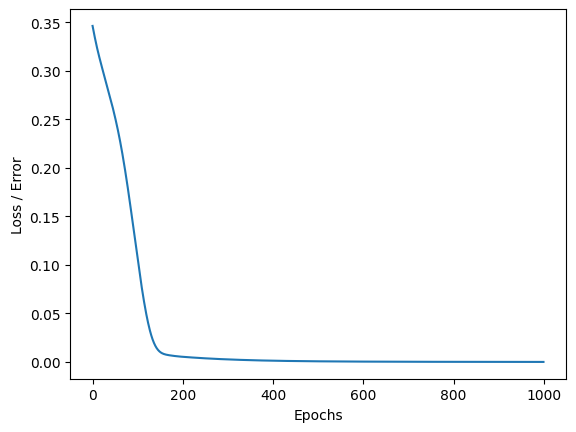

In [30]:
# Model training
epochs = 1000
losses = []

for i in range(epochs):
    # go forward and get a prediction
    y_pred = model.forward(X_train)      # get predicted results

    # Measure the loss/error, gonna be high at first
    loss = criterion(y_pred, y_train)    #predicted values vs the y_train

    # keep track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epochs
    if i % 10 == 0:
        print(f'Epochs: {i} and loss: {loss}')

    # Do some backpropagation: take the error rate of forward propagation and
    # feed it back through the network to fine-tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss / Error')
plt.xlabel('Epochs')
plt.show()

In [31]:
# Evaluate Model on Test data set
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
    print(f'Loss: {loss}')

# New motor values for prediction
motors_new = [[2122,2287,2353,1855,1838,1819]]  # Replace with actual new motor values

# Normalize the new motor values
motors_new = scaler_motors.transform(motors_new)
motors_new = torch.tensor(motors_new, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    positions_pred = model(motors_new)
    positions_pred = scaler_positions.inverse_transform(positions_pred.numpy())

print('Predicted positions:', positions_pred)

Loss: 0.00011390275903977454
Predicted positions: [[ 5.0532722e+01  5.0135258e+01  2.9001016e+02  1.3275877e-02
  -5.5116788e-04  2.2212025e-03]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
